# Wordle Solver Virtual Assistant (WSVA) Analysis: Maximum Word List Size

## Experiment Design

Select 100 words at random from [previous Wordle games](https://github.com/jimthompson5802/wordle_solver/blob/main/data/f-past-wordle-answers.txt). This list is as of 27Jan2024.  

Compare performance of the LLM WSVA for different maximun list size for early processing.


Data generated for this analysis is from the output of `src/run_experiment_100_words.py` and is stored in 

* `data/experiment_100_words.csv`
* `data/experiment_100_words_max_size_50.csv`
* `data/experiment_100_words_max_size_15.csv`

In [1]:
import pandas as pd

/tmp/ipykernel_40917/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load the experiment data from a CSV file
df = pd.read_csv('../data/experiment_100_words.csv')
df['max_size'] = 25
df2 = pd.read_csv('../data/experiment_100_words_max_size_50.csv')
df2['max_size'] = 50
df3 = pd.read_csv('../data/experiment_100_words_max_size_15.csv')
df3['max_size'] = 15

df = pd.concat([df, df2, df3], ignore_index=True)
df = df[df.solver_type == 'llm']
print(df.shape)
# Add a new column 'solved_wordle' to the dataframe. 
# This column is True if 'num_attempts' is less than or equal to 6 (indicating the Wordle was solved within the allowed attempts), and False otherwise.
df["solved_wordle"] = df.num_attempts <= 6

# Display a random sample of 5 rows from the dataframe
df.sample(5)

(300, 5)


,solver_type,initial_word,word,num_attempts,max_size,solved_wordle
540,llm,trace,ample,5,15,True
391,llm,trace,kayak,4,50,True
548,llm,trace,badge,3,15,True
118,llm,trace,block,3,25,True
365,llm,trace,avert,6,50,True


In [3]:
df.groupby('max_size').describe()

num_attempts                                         
                count  mean       std  min  25%  50%  75%  max
max_size                                                      
15              100.0  4.59  1.146757  2.0  4.0  5.0  5.0  8.0
25              100.0  4.61  1.033724  2.0  4.0  5.0  5.0  7.0
50              100.0  4.50  1.132620  2.0  4.0  4.5  5.0  7.0

## Compare Success Rates By Maximum Size Word List

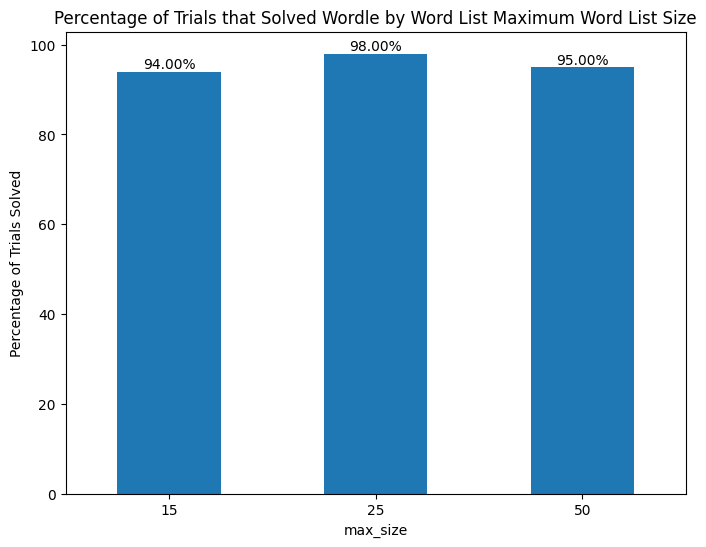

In [4]:
import matplotlib.pyplot as plt

# Group by solver and calculate the percentage of solved Wordle
solved_percentages = df.groupby('max_size')['solved_wordle'].mean() * 100

# Plot
plt.figure(figsize=(8, 6))
bars = solved_percentages.plot(kind='bar')
plt.ylabel('Percentage of Trials Solved')
plt.title('Percentage of Trials that Solved Wordle by Word List Maximum Word List Size')

# Add percentage labels on top of each bar
for bar in bars.patches:
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
              f'{bar.get_height():.2f}%', ha='center', va='bottom')

# Rotate x-axis labels
plt.xticks(rotation=0)
plt.savefig('../docs/images/percentage_solved_100_words_max_size.png')
plt.show()

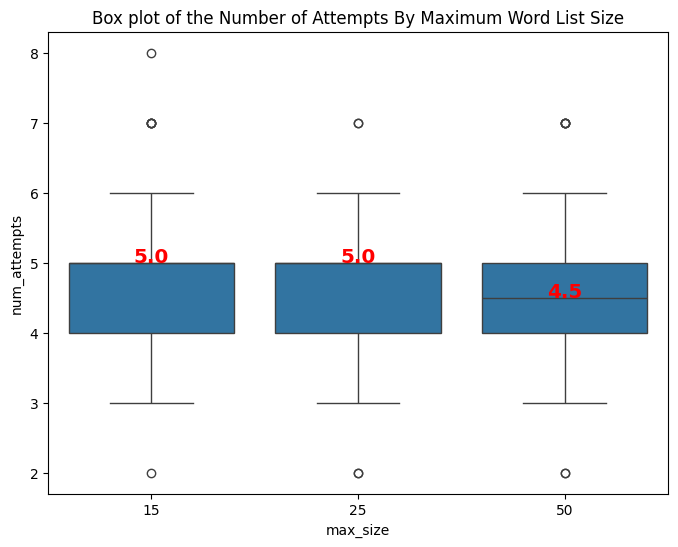

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a box plot
plt.figure(figsize=(8, 6))
box_plot = sns.boxplot(x='max_size', y='num_attempts', data=df)

medians = df.groupby(['max_size'])['num_attempts'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]

pos = range(len(medians))
for tick,label in zip(pos,box_plot.get_xticklabels()):
    box_plot.text(pos[tick], medians[tick], median_labels[tick], 
            horizontalalignment='center', size='x-large', color='r', weight='semibold')

plt.title('Box plot of the Number of Attempts By Maximum Word List Size')
plt.savefig('../docs/images/boxplot_num_attempts_100_words_max_size.png')
plt.show()

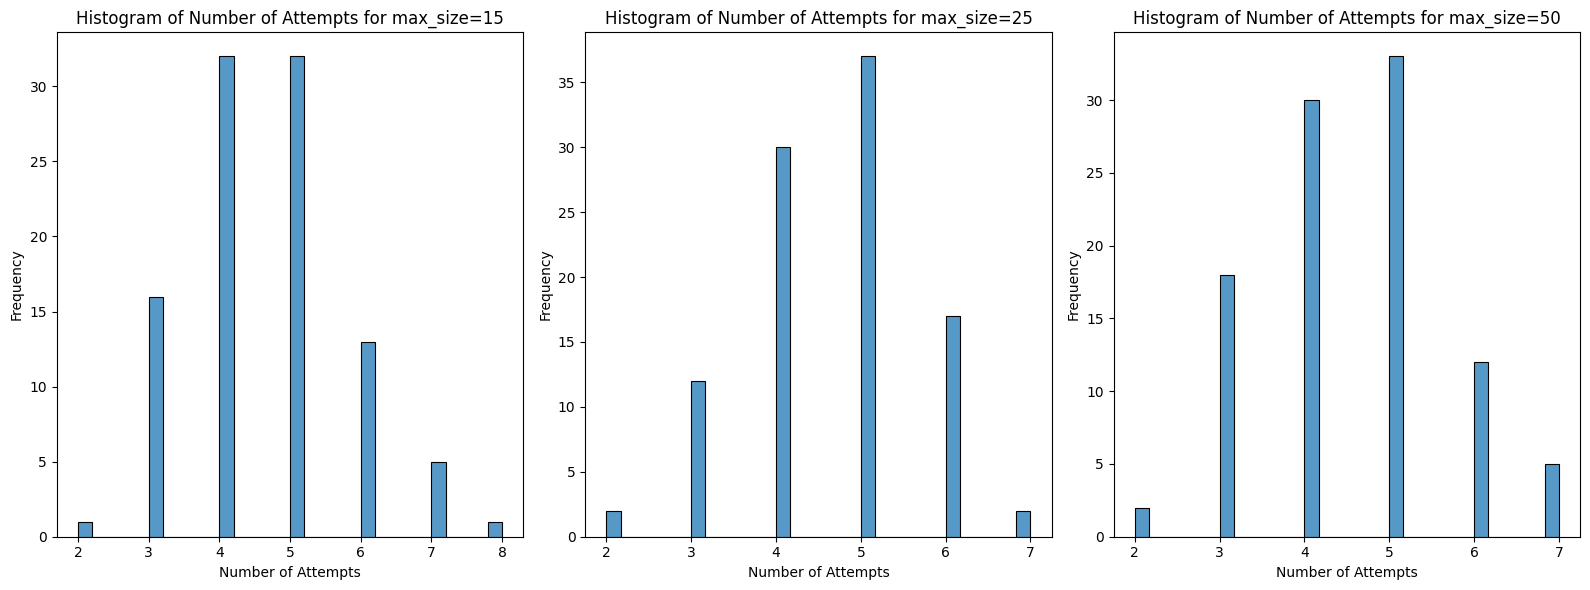

In [6]:
# Filter the DataFrame for the maximum word list size
max_size_15_df = df[df['max_size'] == 15]
max_size_25_df = df[df['max_size'] == 25]
max_size_50_df = df[df['max_size'] == 50]

fig, axs = plt.subplots(1, 3, figsize=(16, 6))

# Plot the histogram for max_size=15
sns.histplot(max_size_15_df['num_attempts'], bins=30, kde=False, ax=axs[0])
axs[0].set_title('Histogram of Number of Attempts for max_size=15')
axs[0].set_xlabel('Number of Attempts')
axs[0].set_ylabel('Frequency')

# Plot the histogram for max_size=25
sns.histplot(max_size_25_df['num_attempts'], bins=30, kde=False, ax=axs[1])
axs[1].set_title('Histogram of Number of Attempts for max_size=25')
axs[1].set_xlabel('Number of Attempts')
axs[1].set_ylabel('Frequency')


# Plot the histogram for max_size=50
sns.histplot(max_size_50_df['num_attempts'], bins=30, kde=False, ax=axs[2])
axs[2].set_title('Histogram of Number of Attempts for max_size=50')
axs[2].set_xlabel('Number of Attempts')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('../docs/images/histogram_num_attempts_trace_max_size.png')
plt.show()

In [7]:
df.groupby('max_size')['num_attempts'].describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
max_size,,,,,,,,,,,
15,100.0,4.59,1.146757,2.0,4.0,5.0,5.0,6.0,7.00,7.01,8.0
25,100.0,4.61,1.033724,2.0,4.0,5.0,5.0,6.0,6.00,7.00,7.0
50,100.0,4.50,1.132620,2.0,4.0,4.5,5.0,6.0,6.05,7.00,7.0
